In [1]:
# create the configuration of the low-fidelity model
import matplotlib.pyplot as plt
import numpy as np
import torch

from mfbml.methods.mf_dnn_bnn import MFDNNBNN
from mfbml.problem_sets.torch_problems import Forrester1b, MengCase1

In [2]:
# define function
func = Forrester1b(noise_std=0.05)
num_dim = 1

# use multi-fidelity forrester function to test the performance of the MFDNNBNN class
lf_samples = torch.linspace(0, 1, 1001).reshape(-1, 1)
hf_samples = lf_samples[::5]  # sample every 5 points


# generate responses
lf_responses = func.lf(lf_samples)
hf_responses = func.hf(hf_samples)

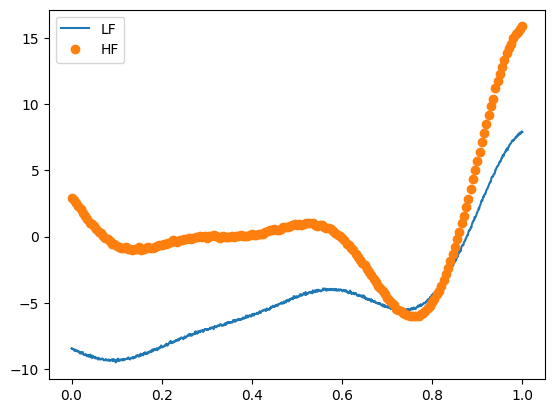

In [4]:
# plot the function
plt.figure()
plt.plot(lf_samples, lf_responses, label="LF")
plt.plot(hf_samples, hf_responses, "o", label="HF")
plt.legend()
plt.show()

In [3]:
# create the configuration of the low-fidelity model
lf_configure = {
    "in_features": 1,
    "hidden_features": [20, 20],
    "out_features": 1,
    "activation": "Tanh",
    "optimizer": "Adam",
    "lr": 0.001,
    "weight_decay": 0.000001,
    "loss": "mse",
}
# create the configuration of the high-fidelity model
hf_configure = {
    "in_features": 1,
    "hidden_features": [50, 50],
    "out_features": 1,
    "activation": "Tanh",
    "lr": 0.001,
    "sigma": 0.05,
}
# create the MFDNNBNN object
mfdnnbnn = MFDNNBNN(
    lf_configure=lf_configure,
    hf_configure=hf_configure,
    beta_optimize=False,
    beta_bounds=[-5, 5],
)


samples = {"lf": lf_samples, "hf": hf_samples}

responses = {"lf": lf_responses, "hf": hf_responses}

# lf train config
lf_train_config = {"batch_size": None, "num_epochs": 20000, "print_iter": 100}
hf_train_config = {
    "num_epochs": 30000,
    "sample_freq": 100,
    "print_info": True,
    "burn_in_epochs": 20000,
}

# train the MFDNNBNN object
mfdnnbnn.train(
    samples=samples,
    responses=responses,
    lf_train_config=lf_train_config,
    hf_train_config=hf_train_config,
)
# predict the MFDNNBNN object
y, epistemic, total_unc, aleatoric = mfdnnbnn.predict(
    x=torch.linspace(0, 1, 1000).reshape(-1, 1)
)
# lf prediction
lf_y = mfdnnbnn.lf_model.forward(torch.linspace(0, 1, 1000).reshape(-1, 1))

epoch:  99 loss:  20.77771759033203
epoch:  199 loss:  14.848939895629883
epoch:  299 loss:  7.10593318939209
epoch:  399 loss:  3.8234968185424805
epoch:  499 loss:  3.407193660736084
epoch:  599 loss:  3.2973978519439697
epoch:  699 loss:  3.2002944946289062
epoch:  799 loss:  3.0736773014068604
epoch:  899 loss:  2.8709936141967773
epoch:  999 loss:  2.5387067794799805
epoch:  1099 loss:  2.1272199153900146
epoch:  1199 loss:  1.679405689239502
epoch:  1299 loss:  1.2592946290969849
epoch:  1399 loss:  0.9488880038261414
epoch:  1499 loss:  0.7346100807189941
epoch:  1599 loss:  0.5860073566436768
epoch:  1699 loss:  0.4807848334312439
epoch:  1799 loss:  0.40433400869369507
epoch:  1899 loss:  0.3477199971675873
epoch:  1999 loss:  0.3055017590522766
epoch:  2099 loss:  0.27409860491752625
epoch:  2199 loss:  0.2508139908313751
epoch:  2299 loss:  0.23348170518875122
epoch:  2399 loss:  0.22039398550987244
epoch:  2499 loss:  0.2102588713169098
epoch:  2599 loss:  0.202126562595367

/home/yaga/Documents/mfbml/mfbml/methods/bnn.py:170: UserWarning: This overload of addcmul_ is deprecated:
	addcmul_(Number value, Tensor tensor1, Tensor tensor2)
Consider using one of the following signatures instead:
	addcmul_(Tensor tensor1, Tensor tensor2, *, Number value) (Triggered internally at ../torch/csrc/utils/python_arg_parser.cpp:1519.)
  V.mul_(alpha).addcmul_(1 - alpha, d_p, d_p)


epoch:   101/30000
nll_loss: 324421.781, prior_loss: 2511.354, total: 326933.125
noise: 0.050
epoch:   201/30000
nll_loss: 219604.391, prior_loss: 2514.432, total: 222118.812
noise: 0.050
epoch:   301/30000
nll_loss: 179374.438, prior_loss: 2517.454, total: 181891.891
noise: 0.050
epoch:   401/30000
nll_loss: 155519.062, prior_loss: 2520.710, total: 158039.781
noise: 0.050
epoch:   501/30000
nll_loss: 145579.359, prior_loss: 2523.531, total: 148102.891
noise: 0.050
epoch:   601/30000
nll_loss: 141383.953, prior_loss: 2526.707, total: 143910.656
noise: 0.050
epoch:   701/30000
nll_loss: 136293.875, prior_loss: 2531.548, total: 138825.422
noise: 0.050
epoch:   801/30000
nll_loss: 130664.508, prior_loss: 2538.062, total: 133202.578
noise: 0.050
epoch:   901/30000
nll_loss: 124994.961, prior_loss: 2544.865, total: 127539.828
noise: 0.050
epoch:  1001/30000
nll_loss: 112545.055, prior_loss: 2554.002, total: 115099.055
noise: 0.050
epoch:  1101/30000
nll_loss: 92245.281, prior_loss: 2565.080

In [12]:
y, epistemic, total_unc, aleatoric = mfdnnbnn.predict(
    x=torch.linspace(-1, 2, 1000).reshape(-1, 1)
)
# lf prediction
lf_y = mfdnnbnn.lf_model.forward(torch.linspace(-1, 2, 1000).reshape(-1, 1))

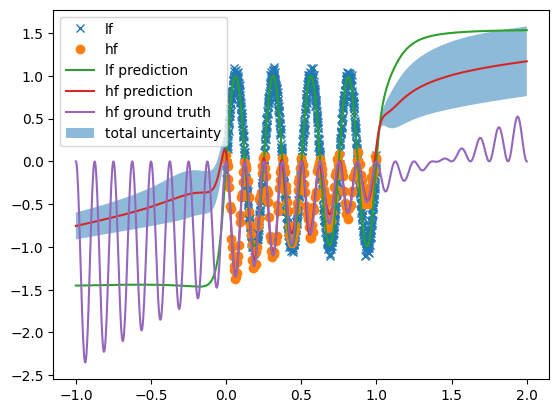

In [13]:
# print the prediction

# plot

plt.figure()
plt.plot(lf_samples, lf_responses, "x", label="lf")
plt.plot(hf_samples, hf_responses, "o", label="hf")
# plot lf prediction
plt.plot(
    torch.linspace(-1, 2, 1000).numpy(), lf_y.detach().numpy(), label="lf prediction"
)
plt.plot(torch.linspace(-1, 2, 1000).numpy(), y, label="hf prediction")
plt.plot(
    torch.linspace(-1, 2, 1000).numpy(),
    func.hf(torch.linspace(-1, 2, 1000).reshape(-1, 1),
            noise_hf=0.0).detach().numpy(),
    label="hf ground truth",
)
plt.fill_between(
    torch.linspace(-1, 2, 1000).numpy(),
    (y - 2 * epistemic).reshape(-1),
    (y + 2 * epistemic).reshape(-1),
    alpha=0.5,
    label="total uncertainty",
)
plt.legend()
# plt.savefig("mfdnnbnn.png", bbox_inches='tight', dpi=300)
plt.show()

In [5]:
# train a standard bnn to fit the data
from mfbml.methods.bnn import BNNWrapper


# create the model
model = BNNWrapper(
    in_features=1,
    hidden_features=[50, 50],
    out_features=1,
    activation="Tanh",
    lr=0.001,
    sigma=0.05,
)


# train the model
model.train(
    x=hf_samples,
    y=hf_responses,
    num_epochs=50000,
    sample_freq=100,
    burn_in_epochs=20000,
)

epoch:     1/50000
nll_loss: 14070.740, prior_loss: 2506.938, total: 16577.678
noise: 0.050
epoch:   101/50000
nll_loss: 4362.351, prior_loss: 2512.808, total: 6875.159
noise: 0.050
epoch:   201/50000
nll_loss: 4382.723, prior_loss: 2517.969, total: 6900.691
noise: 0.050
epoch:   301/50000
nll_loss: 4407.162, prior_loss: 2522.448, total: 6929.610
noise: 0.050
epoch:   401/50000
nll_loss: 4365.663, prior_loss: 2525.305, total: 6890.968
noise: 0.050
epoch:   501/50000
nll_loss: 4448.692, prior_loss: 2530.977, total: 6979.668
noise: 0.050
epoch:   601/50000
nll_loss: 4455.106, prior_loss: 2536.548, total: 6991.654
noise: 0.050
epoch:   701/50000
nll_loss: 4377.331, prior_loss: 2542.830, total: 6920.161
noise: 0.050
epoch:   801/50000
nll_loss: 4366.230, prior_loss: 2549.009, total: 6915.239
noise: 0.050
epoch:   901/50000
nll_loss: 4373.558, prior_loss: 2554.317, total: 6927.875
noise: 0.050
epoch:  1001/50000
nll_loss: 4366.310, prior_loss: 2562.883, total: 6929.193
noise: 0.050
epoch:  

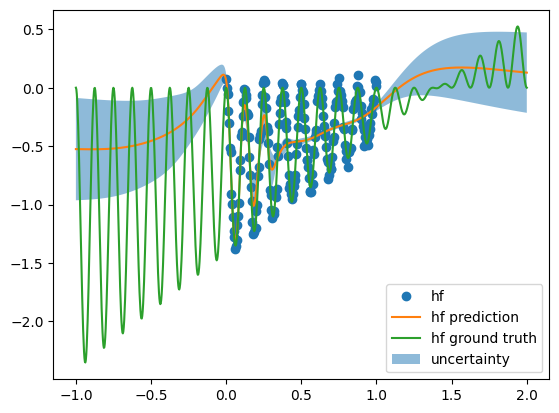

In [11]:
# predict the model
bnn_y, bnn_epistemic, bnn_total_unc, bnn_aleatoric = model.predict(
    x=torch.linspace(-1, 2, 1000).reshape(-1, 1)
)

# plot
plt.figure()
plt.plot(hf_samples, hf_responses, "o", label="hf")
plt.plot(torch.linspace(-1, 2, 1000).numpy(), bnn_y, label="hf prediction")
plt.plot(
    torch.linspace(-1, 2, 1000).numpy(),
    func.hf(torch.linspace(-1, 2, 1000).reshape(-1, 1),
            noise_hf=0.0).detach().numpy(),
    label="hf ground truth",
)
plt.fill_between(
    torch.linspace(-1, 2, 1000).numpy(),
    (bnn_y - 2 * bnn_epistemic).reshape(-1),
    (bnn_y + 2 * bnn_epistemic).reshape(-1),
    alpha=0.5,
    label="uncertainty",
)
plt.legend()
# plt.savefig("bnn.png", bbox_inches='tight', dpi=300)
plt.show()

In [7]:
# try to get the accuracy metrics of the two models
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# for mfdnnbnn
print("mfdnnbnn")
print(
    "mse: ",
    mean_squared_error(
        func.hf(torch.linspace(-1, 2, 1000).reshape(-1, 1), noise_hf=0.0)
        .detach()
        .numpy(),
        y,
    ),
)
print(
    "r2: ",
    r2_score(
        func.hf(torch.linspace(-1, 2, 1000).reshape(-1, 1), noise_hf=0.0)
        .detach()
        .numpy(),
        y,
    ),
)
print(
    "mae: ",
    mean_absolute_error(
        func.hf(torch.linspace(-1, 2, 1000).reshape(-1, 1), noise_hf=0.0)
        .detach()
        .numpy(),
        y,
    ),
)

# for bnn
print("bnn")
print(
    "mse: ",
    mean_squared_error(
        func.hf(torch.linspace(-1, 2, 1000).reshape(-1, 1), noise_hf=0.0)
        .detach()
        .numpy(),
        bnn_y,
    ),
)
print(
    "r2: ",
    r2_score(
        func.hf(torch.linspace(-1, 2, 1000).reshape(-1, 1), noise_hf=0.0)
        .detach()
        .numpy(),
        bnn_y,
    ),
)
print(
    "mae: ",
    mean_absolute_error(
        func.hf(torch.linspace(-1, 2, 1000).reshape(-1, 1), noise_hf=0.0)
        .detach()
        .numpy(),
        bnn_y,
    ),
)

mfdnnbnn
mse:  0.3868497702161881
r2:  -0.004346538144603951
mae:  0.4871467466411514
bnn
mse:  0.31990287
r2:  0.16946228730075374
mae:  0.40532202


In [8]:
def nog_likelihood_function(
    pred: np.ndarray,
    real: np.ndarray,
    sigma: np.ndarray,
) -> np.ndarray:
    # calculate the negative log likelihood
    # pred: the predicted mean
    # real: the real value
    # sigma: the predicted standard deviation
    # return: the negative log likelihood

    # calculate the log likelihood
    nll = -0.5 * np.log(2 * np.pi * sigma**2) - 0.5 * \
        ((real - pred) / sigma) ** 2

    return nll.sum()

In [9]:
# calculate the negative log likelihood
print("mfdnnbnn")
print(
    "nll: ",
    nog_likelihood_function(
        y,
        func.hf(torch.linspace(-1, 2, 1000).reshape(-1, 1), noise_hf=0.05)
        .detach()
        .numpy(),
        total_unc,
    ),
)
print("bnn")
print(
    "nll: ",
    nog_likelihood_function(
        bnn_y,
        func.hf(torch.linspace(-1, 2, 1000).reshape(-1, 1), noise_hf=0.05)
        .detach()
        .numpy(),
        bnn_total_unc,
    ),
)

mfdnnbnn
nll:  -63673.247887848804
bnn
nll:  -5763.282


In [10]:
# plot results of mfrbfgp and gpr in one figure
test_x = torch.linspace(-1, 2, 1000).reshape(-1, 1).numpy()
test_hy = (
    func.hf(torch.linspace(-1, 2, 1000).reshape(-1, 1),
            noise_hf=0.0).detach().numpy()
)
test_ly = (
    func.lf(torch.linspace(-1, 2, 1000).reshape(-1, 1),
            noise_lf=0.0).detach().numpy()
)

fig, ax = plt.subplots(-1, 2, figsize=(12, 5))
ax[0].plot(
    samples["hf"].numpy(),
    responses["hf"].numpy(),
    "x",
    color="#EE3377",
    linewidth=2,
    markersize=8,
    label="HF samples",
)
ax[0].plot(
    test_x, test_hy, "--", color="#EE7733", linewidth=2, label="HF noiseless truth"
)
ax[0].plot(test_x, y, "-", color="#0077BB", linewidth=2, label="HF prediction")
ax[0].plot(test_x, test_ly, "--", color="#33BBEE",
           linewidth=2, label="LF truth")
ax[0].plot(
    test_x,
    lf_y.detach().numpy(),
    "-",
    color="#CC3311",
    linewidth=2,
    label="LF prediction",
)
# ax[0].plot(sample_x["lf"], sample_y["lf"], "x", label="lf samples")
ax[0].fill_between(
    test_x.flatten(),
    (y - 2 * total_unc).flatten(),
    (y + 2 * total_unc).flatten(),
    alpha=0.5,
    color="#BBBBBB",
    label="CI interval",
)
ax[0].legend()
ax[0].set_title("MFDNNBNN")
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
# for gpr
ax[1].plot(
    samples["hf"].numpy(),
    responses["hf"].numpy(),
    "x",
    color="#EE3377",
    linewidth=2,
    markersize=8,
    label="HF samples",
)
ax[1].plot(
    test_x, test_hy, "--", color="#EE7733", linewidth=2, label="HF noiseless truth"
)
ax[1].plot(test_x, bnn_y, "-", color="#0077BB",
           linewidth=2, label="HF prediction")
ax[1].fill_between(
    test_x.flatten(),
    (bnn_y - 2 * bnn_total_unc).flatten(),
    (bnn_y + 2 * bnn_total_unc).flatten(),
    alpha=0.5,
    color="#BBBBBB",
    label="CI interval",
)
ax[1].legend()
ax[1].set_title("BNN")
ax[1].set_xlabel("x")
ax[1].set_ylabel("y")
plt.tight_layout()
plt.savefig("mf_dnn_bnn_known_noise.pdf", dpi=300, bbox_inches="tight")
plt.savefig("mf_dnn_bnn_known_noise.png", dpi=300, bbox_inches="tight")
plt.show()

ValueError: Number of rows must be a positive integer, not -1

<Figure size 1200x500 with 0 Axes>